# Question 3

Importing the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist

Training the MLP model:

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [14]:
x_train = train_images.reshape(60000,784)
x_test = test_images.reshape(10000,784)
x_train = x_train/255.0
x_test = x_test/255.0
y_train = np.reshape(train_labels, (len(train_labels), 1))

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [15]:
tf.random.set_seed(42)

model_mlp = tf.keras.Sequential([
    
    tf.keras.layers.Dense(104, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

model_mlp.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model_mlp.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6950 - accuracy: 0.7825 - val_loss: 0.2106 - val_accuracy: 0.9398
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3278 - accuracy: 0.9141 - val_loss: 0.1597 - val_accuracy: 0.9567
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2641 - accuracy: 0.9318 - val_loss: 0.1400 - val_accuracy: 0.9632
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2263 - accuracy: 0.9423 - val_loss: 0.1381 - val_accuracy: 0.9643
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2038 - accuracy: 0.9476 - val_loss: 0.1393 - val_accuracy: 0.9647
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1933 - accuracy: 0.9510 - val_loss: 0.1171 - val_accuracy: 0.9713
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1702 - accuracy: 0.9546 - val_loss: 0.1274 - val_accuracy:

In [17]:
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (32, 104)                 81640     
                                                                 
 dropout (Dropout)           (32, 104)                 0         
                                                                 
 dense_3 (Dense)             (32, 62)                  6510      
                                                                 
 dropout_1 (Dropout)         (32, 62)                  0         
                                                                 
 dense_4 (Dense)             (32, 32)                  2016      
                                                                 
 dropout_2 (Dropout)         (32, 32)                  0         
                                                                 
 dense_5 (Dense)             (32, 16)                 

In [18]:
predictions_mlp = model_mlp.predict(x_test)
y_preds_mlp = predictions_mlp.argmax(axis =1)

Training the CNN model

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [4]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(28, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(56, (5, 5), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(56, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history_cnn = model_cnn.fit(train_images, train_labels, epochs=30,validation_data=(val_images, val_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 51s 34ms/step - loss: 0.1564 - accuracy: 0.9526 - val_loss: 0.0598 - val_accuracy: 0.9812
Epoch 2/30
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0534 - val_accuracy: 0.9837
Epoch 3/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 4/30
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 5/30
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 6/30
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0456 - val_accuracy: 0.9881
Epoch 7/30
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0514 - val_accura

In [6]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 56)          39256     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 56)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 56)                5

In [7]:
predictions_cnn = model_cnn.predict(test_images)
y_preds_cnn = predictions_cnn.argmax(axis =1)

### Performance Comparision

Comparing the results for each class

In [30]:
print("Report for MLP")
print(classification_report(test_labels, y_preds_mlp))

Report for MLP
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
print("Report for CNN")
print(classification_report(test_labels, y_preds_cnn))

Report for CNN
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Plotting the confusion matrix

In [27]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, title="Confusion MAtrix"): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title=title,
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

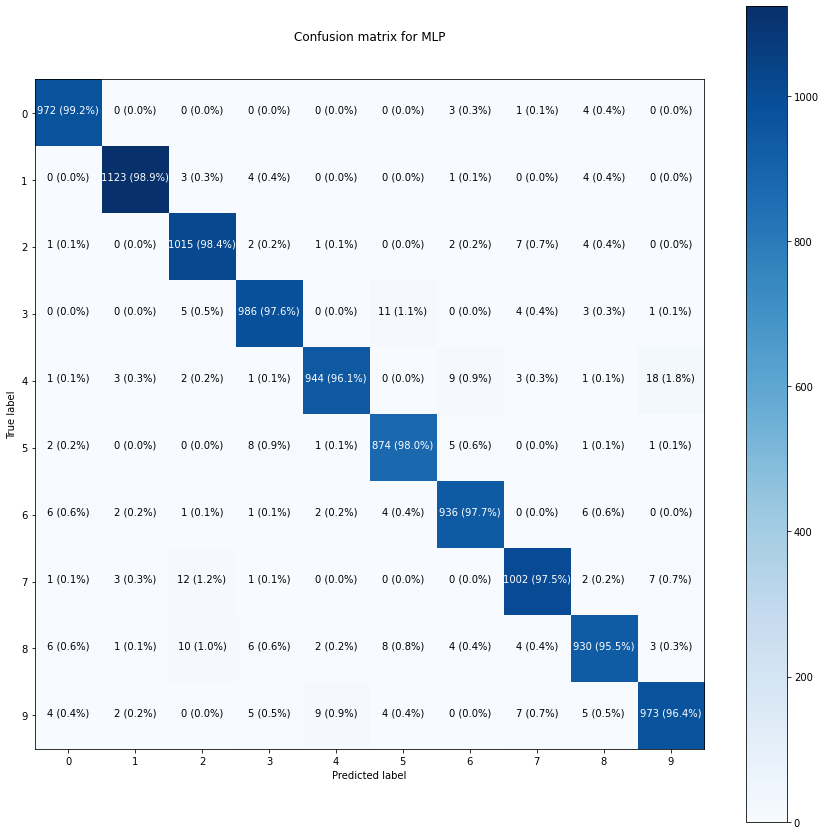

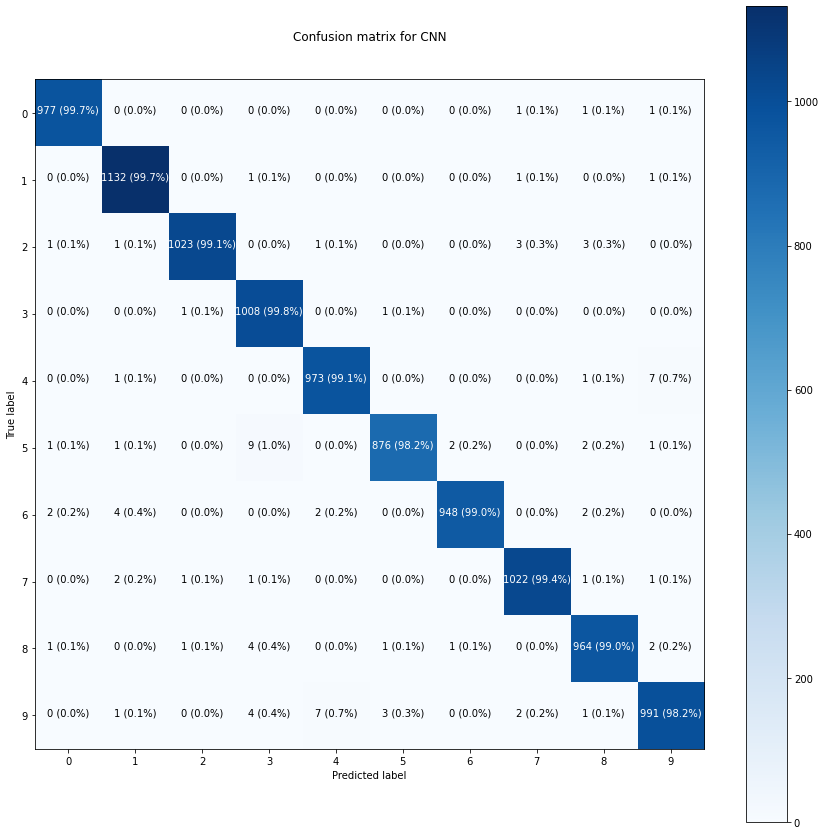

In [28]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds_mlp,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10,
                      title = "Confusion matrix for MLP")

make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds_cnn,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10,
                      title = "Confusion matrix for CNN")